In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.preprocessing import clean_data, convert_to_datetime, map_ip_to_country
from src.feature_engineering import create_time_features

fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_data = pd.read_csv('../data/raw/IpAddress_to_Country.csv')
# Run the pipeline steps
df = clean_data(fraud_data)
df = convert_to_datetime(df, ['signup_time', 'purchase_time'])
df = map_ip_to_country(df, ip_data)
df = create_time_features(df)

2026-02-15 22:48:42,992 - INFO - Starting data cleaning...
2026-02-15 22:48:44,212 - INFO - Mapping IP addresses to countries...


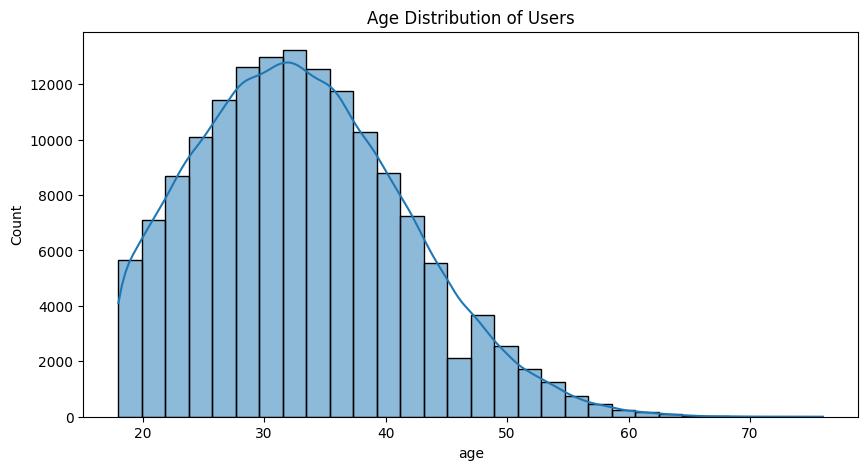

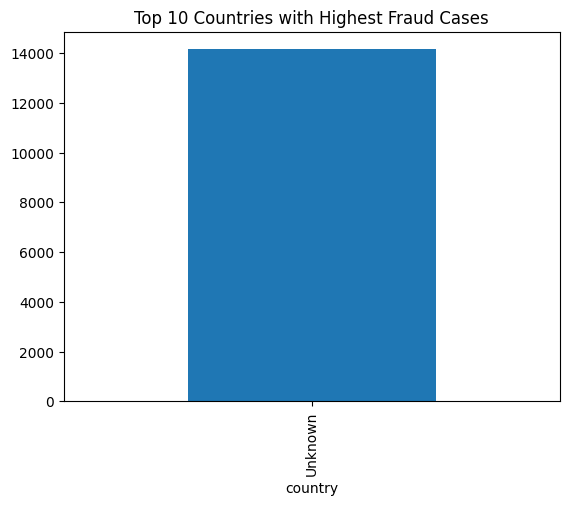

In [3]:
# Univariate: Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True).set_title('Age Distribution of Users')
plt.show()

# Bivariate: Fraud vs Country (Top 10)
top_countries = df[df['class'] == 1]['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries with Highest Fraud Cases')
plt.show()

Class distribution before SMOTE:
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


2026-02-15 22:48:55,611 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-15 22:48:55,760 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


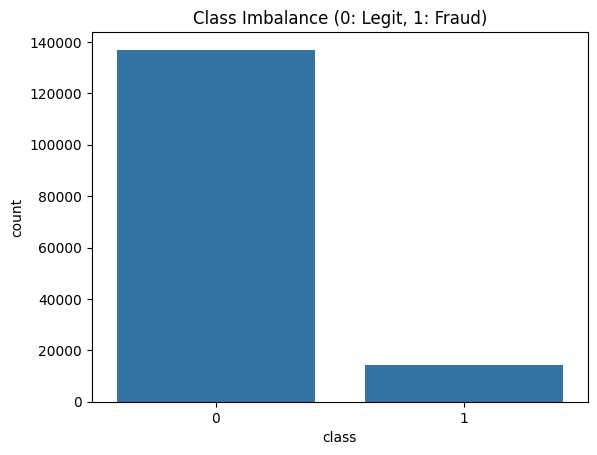

In [4]:
# Before SMOTE
print("Class distribution before SMOTE:")
print(df['class'].value_counts(normalize=True))

sns.countplot(x='class', data=df).set_title('Class Imbalance (0: Legit, 1: Fraud)')
plt.show()

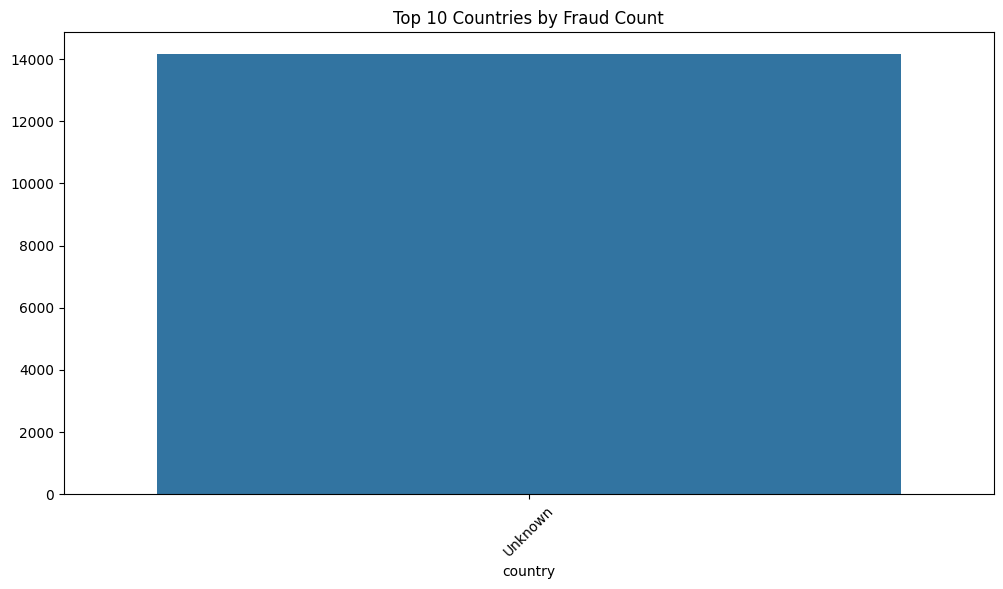

In [5]:
plt.figure(figsize=(12, 6))
fraud_by_country = df[df['class'] == 1]['country'].value_counts().head(10)
sns.barplot(x=fraud_by_country.index, y=fraud_by_country.values)
plt.title('Top 10 Countries by Fraud Count')
plt.xticks(rotation=45)
plt.show()